In [1]:
!pip install pandas numpy scikit-learn matplotlib nltk seaborn wordcloud xgboost pickle-mixin


  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=77f0deeea53e2d87767282d48a93fb5c16385e9df3c61f118b4f0df240a7ad53
  Stored in directory: /root/.cache/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin


In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [6]:
df= pd.read_csv('/content/gdrive/MyDrive/Review detection/fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [7]:
df.drop(columns = {'category'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  40432 non-null  float64
 1   label   40432 non-null  object 
 2   text_   40432 non-null  object 
dtypes: float64(1), object(2)
memory usage: 947.8+ KB


In [9]:
df.rename(columns = {'text_': 'text'}, inplace = True)

In [10]:
df.head()

,rating,label,text
0,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,5.0,CG,"love it, a great upgrade from the original. I..."
2,5.0,CG,This pillow saved my back. I love the look and...
3,1.0,CG,"Missing information on how to use it, but it i..."
4,5.0,CG,Very nice set. Good quality. We have had the s...


In [11]:
def encode_label(df):
    labels = {
        'CG': 0,
        'OR': 1
    }

    df['target'] = df['label'].map(labels)

    return df

In [12]:
df = encode_label(df)
df['target'] = df['target'].fillna(0).replace([np.inf, -np.inf], 0)
df['target'] = df['target'].astype(int)
df.head()

,rating,label,text,target
0,5.0,CG,"Love this! Well made, sturdy, and very comfor...",0
1,5.0,CG,"love it, a great upgrade from the original. I...",0
2,5.0,CG,This pillow saved my back. I love the look and...,0
3,1.0,CG,"Missing information on how to use it, but it i...",0
4,5.0,CG,Very nice set. Good quality. We have had the s...,0


In [13]:
df.drop(columns = {'rating', 'label'}, inplace = True)

In [14]:
df = df.sample(frac=1).reset_index(drop=True)

df.sample(10)

,text,target
15843,Love it!! We got it for our boy who turned 3 ...,1
22917,"As an owner of the Canon EOS Rebel T2i, I can ...",0
15344,Blake set the bar high in the first Baba Yaga ...,1
9259,Plenty of articles and factoids on the subject...,0
12517,This set includes 5 different animals that are...,1
18011,The amount of awesomeness we've had with the B...,0
37670,My kitties wouldn't try it or use it. Good id...,1
31631,**** SPOILER ALERT ****\n\nThe story starts wi...,0
26141,my old battery drill needed another set of bat...,1
19882,I had goosebumps as I read Sweet Justice. Tess...,1


In [15]:
df.isnull().sum()

,0
text,0
target,0


In [16]:
df.duplicated().sum()

np.int64(20)

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df['target'].value_counts()

,count
target,
1,20215
0,20197


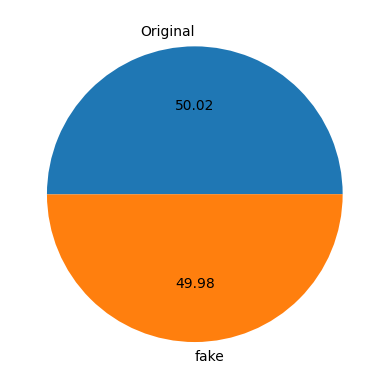

In [20]:
plt.pie(df['target'].value_counts(), labels=['Original', 'fake'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<Axes: >

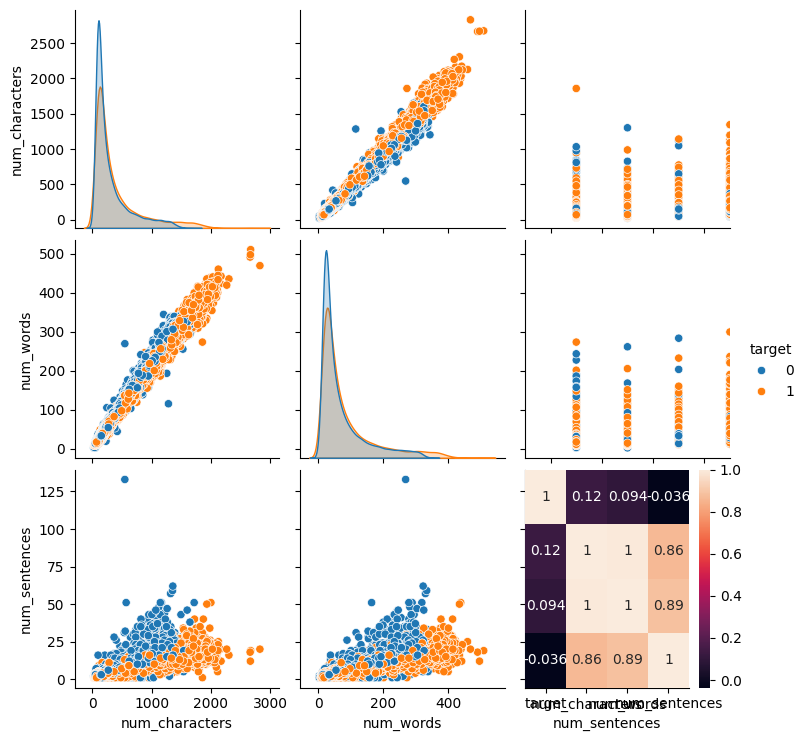

In [22]:
df.head()
df.describe()
sns.pairplot(df,hue='target')
df_numeric = df.select_dtypes(include = 'number')
sns.heatmap(df_numeric.corr(),annot=True)

In [23]:
ps = PorterStemmer()

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [25]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [26]:
df['transformed_text'] = df['text'].apply(transform_text)

In [27]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Love them, fit well, my daughter loves them.Ve...",0,124,27,3,love fit well daughter love comfort love style...
1,"It's a shame that with this book, the movie ve...",0,963,224,14,shame book movi version also disappoint stori ...
2,I am a heavy sleeper looking for an alarm that...,1,1292,280,14,heavi sleeper look alarm wake give extra boost...
3,better be flat and level when you bring it dow...,1,119,24,1,better flat level bring batteri could knock do...
4,"Hard to read, but difficult to read, and very ...",0,93,21,2,hard read difficult read enjoy stori told point


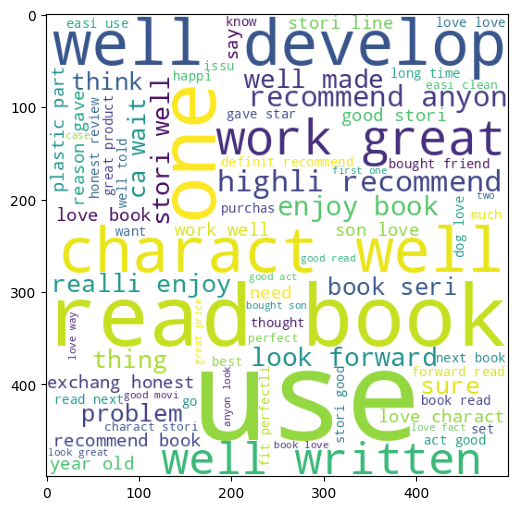

In [28]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
fake_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)

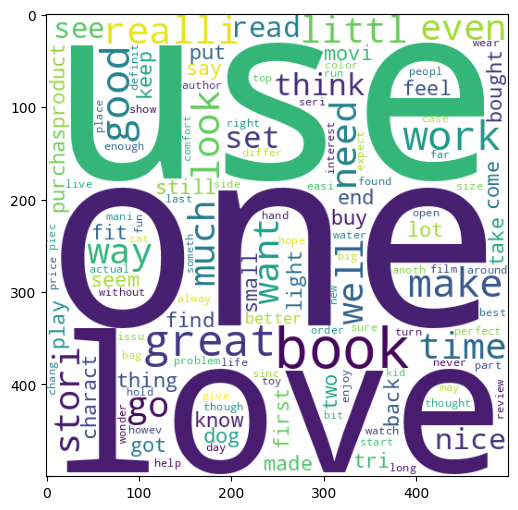

In [29]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
original_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(original_wc)

In [30]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [31]:
print(X.shape)
print(y.shape)

(40412, 3000)
(40412,)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
  knc = KNeighborsClassifier()
  mnb = MultinomialNB()
  dtc = DecisionTreeClassifier(max_depth=5)
  lrc = LogisticRegression(solver='liblinear', penalty='l1')
  rfc = RandomForestClassifier(n_estimators=50, random_state=2)
  abc = AdaBoostClassifier(n_estimators=50, random_state=2)
  xgb = XGBClassifier(n_estimators=50,random_state=2)

In [34]:
clfs = {
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'xgb':xgb
}

In [35]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')

    return accuracy,precision

In [36]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [37]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [38]:
performance_df.reset_index(drop = True)

,Algorithm,Accuracy,Precision
0,LR,0.856736,0.856740
1,NB,0.838674,0.839119
2,RF,0.832859,0.834458
3,xgb,0.810466,0.811583
4,AdaBoost,0.687987,0.694061
5,DT,0.594210,0.643900
6,KN,0.498825,0.469651


In [39]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [40]:
voting = VotingClassifier(estimators=[('LR', lrc), ('nb', mnb), ('RF', rfc)],voting='soft')

In [41]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('nb', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [42]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8683657058023011
Precision 0.8773177546355093


In [43]:
estimators = [('LR', lrc), ('nb', mnb), ('RF', rfc)]
final_estimator = RandomForestClassifier(n_estimators=50, random_state=2)

In [44]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [45]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8557466287269578
Precision 0.858894170627971


In [46]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# Drive path
drive_path = "/content/gdrive/MyDrive/Review detection/"

# Save model and vectorizer
with open(drive_path + 'fake_review_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open(drive_path + 'tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("✅ Model and vectorizer saved.")


✅ Model and vectorizer saved.


In [47]:
# Load model and vectorizer
with open(drive_path + 'fake_review_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open(drive_path + 'tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

# Preprocessing function
nltk.download('punkt')
nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Sample reviews to test
test_reviews = [
    "This product is amazing, I totally recommend it to everyone!",
    "Worst experience ever. Total scam.",
    "Absolutely fantastic! Will buy again.",
    "Terrible. Don't waste your money.",
    "Great value for the price.",
    "It’s okay, but I’ve seen better.",
    "This is a life-changing product!",
    "Doesn't work at all. Very disappointed.",
    "Love it! Five stars.",
    "Fake product. Not what I expected at all."
]

# Transform and vectorize
transformed_reviews = [transform_text(review) for review in test_reviews]
vectorized_reviews = loaded_vectorizer.transform(transformed_reviews)

# Predict
predictions = loaded_model.predict(vectorized_reviews)

# Fakeness Index
fakeness_score = sum(1 for p in predictions if p == 0) / len(predictions) * 100

# Print predictions
print("\n📄 Review Predictions:\n")
for i, review in enumerate(test_reviews):
    result = "Fake" if predictions[i] == 0 else "Original"
    print(f"{i+1}. \"{review}\"\n   ➤ Prediction: {result}\n")

print(f"🧠 Fakeness Index: {fakeness_score:.2f}%")



📄 Review Predictions:

1. "This product is amazing, I totally recommend it to everyone!"
   ➤ Prediction: Original

2. "Worst experience ever. Total scam."
   ➤ Prediction: Original

3. "Absolutely fantastic! Will buy again."
   ➤ Prediction: Original

4. "Terrible. Don't waste your money."
   ➤ Prediction: Original

5. "Great value for the price."
   ➤ Prediction: Original

6. "It’s okay, but I’ve seen better."
   ➤ Prediction: Original

7. "This is a life-changing product!"
   ➤ Prediction: Fake

8. "Doesn't work at all. Very disappointed."
   ➤ Prediction: Fake

9. "Love it! Five stars."
   ➤ Prediction: Original

10. "Fake product. Not what I expected at all."
   ➤ Prediction: Original

🧠 Fakeness Index: 20.00%
